#Problem statement
Perform clustering (hierarchical,K means clustering ) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [4]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing



In [14]:
xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')
data = pd.read_excel(xls,'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [17]:
data_norm=preprocessing.normalize(data)
df_norm = pd.DataFrame(data_norm)

In [18]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


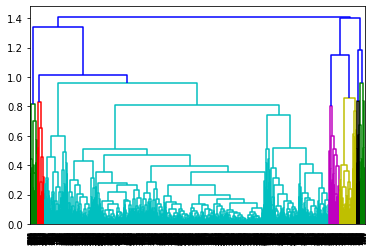

In [21]:
dendo = sch.dendrogram(sch.linkage(df_norm, method='complete'))

We cut the tree at height 1.2 to obtain 3 clusters and then assigned each cluster with its respective observations

In [22]:
X = df_norm.values

In [23]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
h_cluster = model.fit(X)

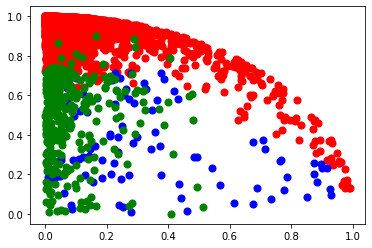

In [25]:
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

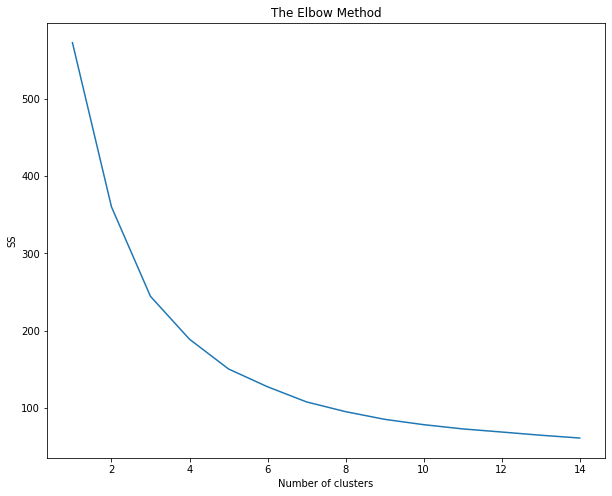

In [26]:
plt.figure(figsize=(10, 8))
ss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    ss.append(kmeans.inertia_)
plt.plot(range(1, 15), ss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show()

As seen from the elbow graph, the slope changes at 3.

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df_norm)

In [29]:
k_means1=k_means+1
k_cluster = list(k_means1)
data['k_cluster'] = k_cluster

In [31]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('k_cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,1994.8,88286.0,166.3,1.8,1.0,1.0,12565.4,10.8,477.7,1.4,4165.5,0.3
2,2430.9,4040.4,16.9,1.0,1.0,1.0,793.2,3.0,68.0,0.3,3313.7,0.1
3,1919.8,48228.9,114.7,3.4,1.0,1.1,40409.6,18.2,553.9,1.7,4272.5,0.7


In [32]:
pd.DataFrame(round(data.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886,2886
2,320,320,320,320,320,320,320,320,320,320,320,320
3,793,793,793,793,793,793,793,793,793,793,793,793


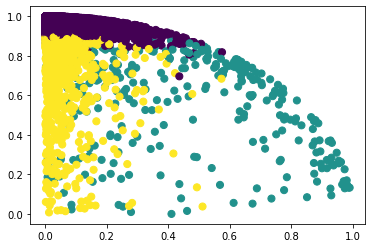

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')